<a href="https://colab.research.google.com/github/Siddhu290/Machine_Learning/blob/main/2024-07-17/DecisionTree_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from sklearn import tree
import numpy as np

In [99]:
x=[[0,0],[1,1]]
y=[0,1]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x,y)

In [100]:
clf.predict([[2.,2.]])

array([1])

In [101]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [102]:
from sklearn.datasets import load_iris

In [103]:
X,Y=load_iris(return_X_y=True)


In [104]:
clf=tree.DecisionTreeClassifier(max_depth=5)
clf=clf.fit(X,Y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

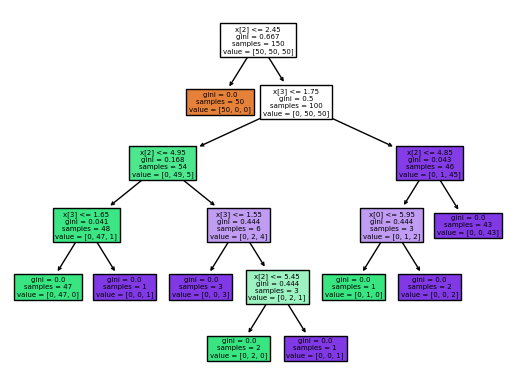

In [105]:
tree.plot_tree(clf.fit(X,Y),filled=True)

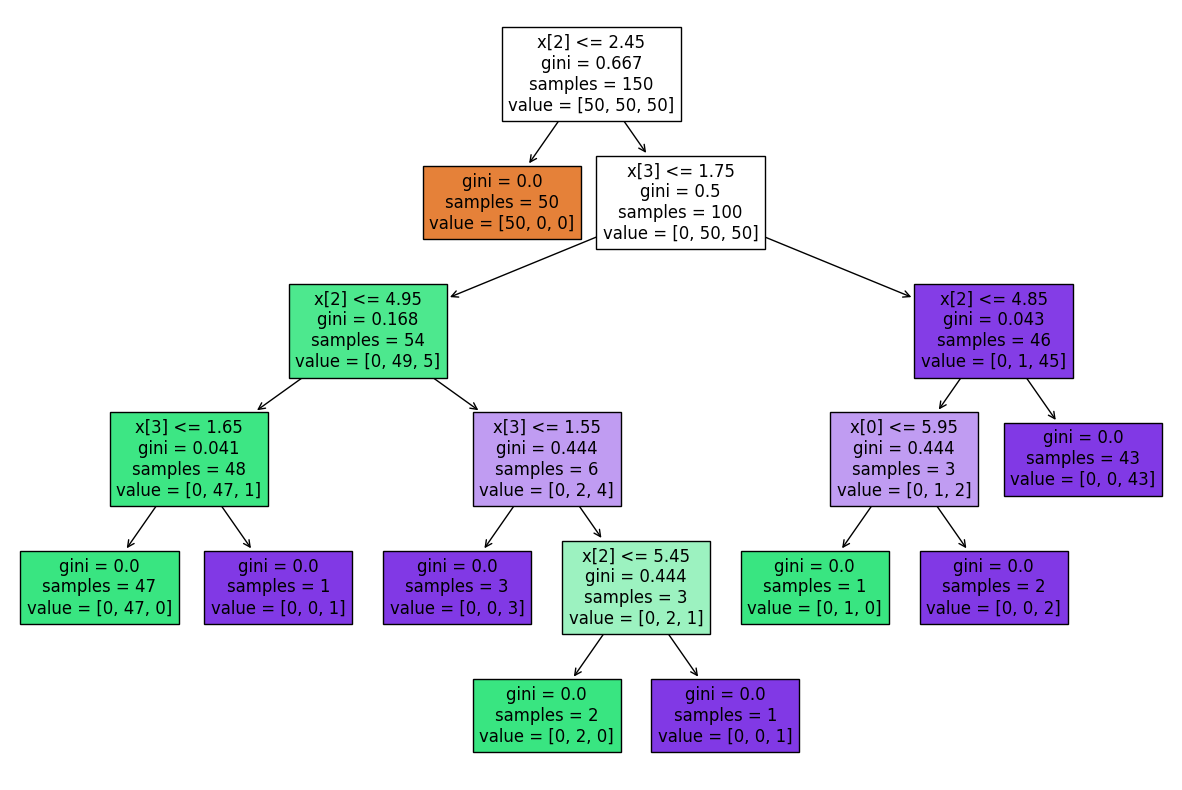

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(clf.fit(X,Y),filled=True)
plt.show()

INFORMATION GAINWe have seen that any variable can be chosen at a node. Given the data, a decision tree mustdecide on these variables.This decision is made usinginformation gain. We require maximum information gain at eachnode. Information gain is the difference in information before and after a node. An equation forinformation gain in showed.

$$I G(D, f) = 1 - \sum_{i=1}^{N} \Sigma_I(D_i)$$


Two commonly used impurity criteria are the entropy and Gini index

$$I_{Entropy} = -\sum_{i=1}^{c} p_i \log_{2} (p_i) $$


$$I_{Gini} = 1 - \sum_{i=1}^{c} p_i^2$$


Gini impurity can only be used for classication problems (categorical target variable). Here,$$(p_i)$$ is the proportions of observations that belongs to class for a particular node.

---

$Shannon$ entropy is a measure of information. When weonly have the data set and have not constructed a decision tree, our entropy (a measure ofmissing information) is high and our information is low. We need to gain information anddecrease entropy (decrease the amount of missing knowledge about our target in this case). Tounderstand this equation, we view our example from below.

imagine you flip a coin.

You don't know if it will be heads or tails (high uncertainty).
This is like high entropy - lots of missing information.
Shannon entropy tells you how uncertain you are.

Knowing it's cloudy (more information) makes rain more likely (lowers uncertainty).
This is like lower entropy - you know more!

---

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [108]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

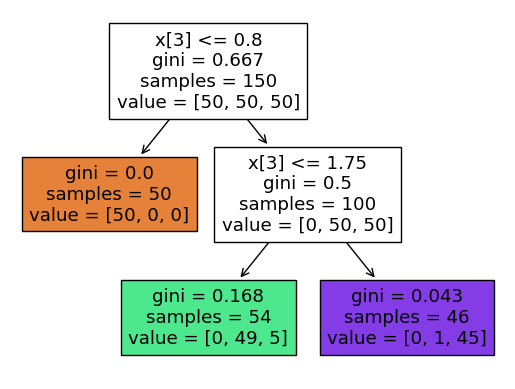

In [109]:
tree.plot_tree(clf)
tree.plot_tree(clf.fit(X,Y),filled=True)
plt.show()

In [110]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)



In [111]:

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]


----
**Decision Tree Node Attributes:**

* `children_left[i]`: Id of the left child node for node `i`, or -1 if it's a leaf node.
* `children_right[i]`: Id of the right child node for node `i`, or -1 if it's a leaf node.
* `feature[i]`: The feature used to split the data at node `i`.
* `threshold[i]`: The threshold value used to split the data at node `i`.
* `n_node_samples[i]`: The number of training samples that reach node `i`.
* `impurity[i]`: The impurity measure (e.g., Gini index) at node `i`. This indicates how well the data at that node is separated by class.
* `weighted_n_node_samples[i]`: The weighted number of training samples reaching node `i`. This can be used for algorithms that incorporate weights for samples.
* `value[i, j, k]`: This is a multi-dimensional array summarizing the training samples reaching node `i`. It captures information for output `j` and class `k`. For regression trees, `class` is usually set to 1.

---


In [112]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

In [113]:

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node with value=[[50. 50. 50.]]: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value=[[50.  0.  0.]].
	node=2 is a split node with value=[[ 0. 50. 50.]]: go to node 3 if X[:, 3] <= 1.75 else to node 4.
		node=3 is a leaf node with value=[[ 0. 49.  5.]].
		node=4 is a leaf node with value=[[ 0.  1. 45.]].


In [114]:

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 3] = 2.4) > 1.75)


## PCA: Simplifying Complex Data

**PCA, or Principal Component Analysis**, is a technique used to manage high-dimensional data. Imagine a giant room with many clothes racks - it's hard to see the individual clothes! PCA helps us organize this room.

* **What it does:** Reduces the number of variables in a dataset while capturing the most important information.
* **Think of it like:** Folding similar clothes together on fewer racks.

**Why we use PCA:**

* **Reduces complexity:** Makes data easier to analyze and visualize, especially for datasets with many features.
* **Improves model performance:** By focusing on the most relevant information, PCA can lead to better results in machine learning algorithms.
* **Saves storage space:**  Smaller datasets require less storage and processing power.

**In simpler terms:**  

PCA helps us see the "big picture" of complex data by focusing on the key patterns and discarding redundancy. This makes data analysis and modeling more efficient and effective.


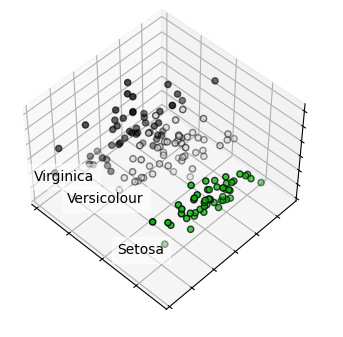

In [115]:
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets

import mpl_toolkits.mplot3d

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
Y = iris.target

fig = plt.figure(1, figsize=(4, 3))


ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[Y == label, 0].mean(),
        X[Y == label, 1].mean() + 1.5,
        X[Y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
Y = np.choose(Y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

---
## Incremental PCA: Processing Big Data on the Fly

**Incremental PCA (iPCA)** is a special technique designed to handle high-dimensional data that arrives in a continuous stream, too large to process all at once. Imagine a never-ending clothesline of laundry! iPCA helps us analyze this data efficiently.

* **What it does:** Processes data chunk-by-chunk, updating the principal components as new information arrives.
* **Think of it like:** Sorting laundry pile by pile, instead of waiting for the whole load.

**Why we use iPCA:**

* **Real-time analysis:** Enables analysis of large datasets as they are received, useful for applications like stock market monitoring or sensor data processing.
* **Memory efficiency:** Reduces memory usage by processing data in small chunks, making it suitable for resource-constrained environments.
* **Faster processing:** Can be faster than processing the entire dataset at once, especially for very large datasets.

---

In [116]:
from sklearn.decomposition import PCA, IncrementalPCA

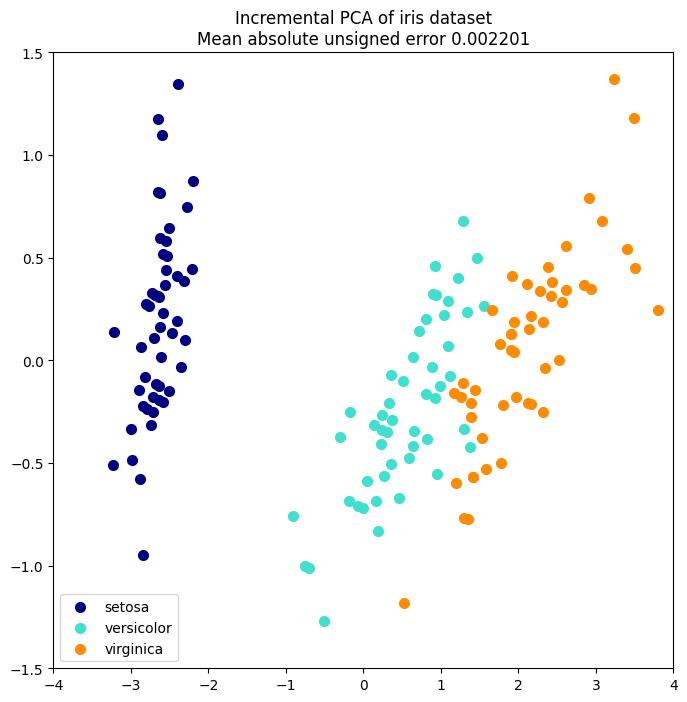

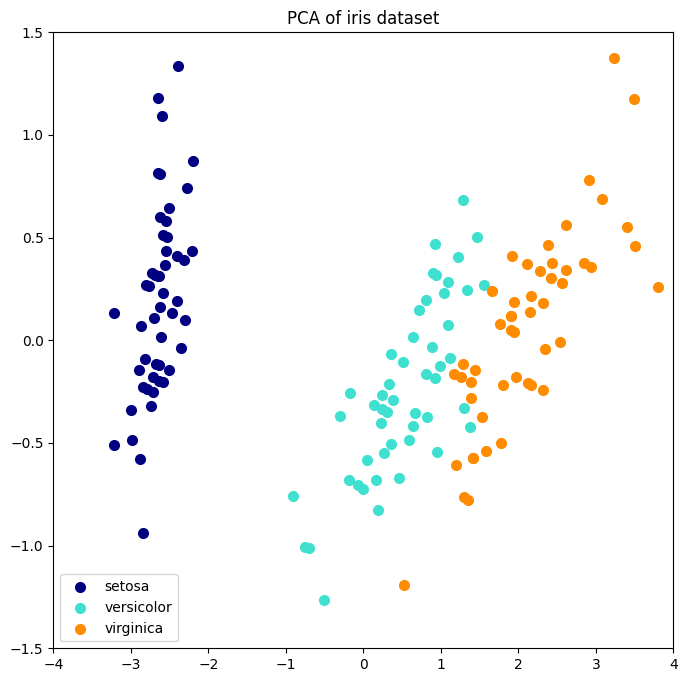

In [117]:
# Authors: Kyle Kastner
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()